<h1> <a href=http://www.datascience-paris-saclay.fr/>Paris Saclay Center for Data Science</a> </h1>

<h2> RAMP on qualitative and quantitative non-invasive monitoring of anti-cancer drugs </h2>

<i>Camille Marini (LTCI/CNRS), Alex Gramfort (LTCI/Télécom ParisTech), Sana Tfaili (Lip(Sys)²/UPSud), Laetitia Le (Lip(Sys)²/UPSud), Mehdi Cherti (LAL/CNRS), Balázs Kégl (LAL/CNRS)</i>

<h2> Introduction </h2>

<p>Chemotherapy is one of the most used treatment against cancer. It uses chemical substances (<a href=https://en.wikipedia.org/wiki/List_of_chemotherapeutic_agents>chemotherapeutic agents</a>) which kill cells that divide too quickly. These chemical substances are often diluted in a particular solution and packaged in bags, diffusers, or syringes, before being administered. <a href=https://books.google.fr/books?id=EB00rD8AqaYC&pg=PA188&lpg=PA188&dq=wrong+chemotherapeutic&source=bl&ots=m7EfyG6A3J&sig=ZVa0hLqDPFe2iExV6FOREJztN8c&hl=en&sa=X&ved=0ahUKEwj_5ZinkarMAhUFnBoKHaJiAgAQ6AEIKDAC#v=onepage&q=wrong%20chemotherapeutic&f=false>Wrong medication</a>  (wrong chemotherapeutic agent or wrong concentration) can have major impacts for patients. To prevent wrong medication, some recent French regulations impose the verification of anti-cancer drugs before their administration. The goal is to check that they contain the good chemotherapeutic agent with the good dosage. 

<p><a href=https://en.wikipedia.org/wiki/Raman_spectroscopy>Raman spectroscopy</a> could be used to make this check, since, theoretically, i) each molecule has a specific spectral fingerprint by which the molecule can be identified; and ii) the Raman intensity increases with the concentration of the molecule. The main advantage of spectroscopy above other methods (for example, liquid chromatography) is that it is non-destructive and non-invasive (measures are made without opening the drug containers). However, this method is rarely used in hospital environment because of the complexity of the spectral signals to analyze. Automating the analysis of these spectral signals could significantly help. Eventually, a complete analytical system (from measuring Raman spectra to identifying the chemotherapeutic agent and its concentration) could be designed, which would be easy to use and would prevent wrong medication. 

<p>In this context, the goal of this project is to develop prediction models able to <b>identify and quantify chemotherapeutic agents from their Raman spectra</b>.  

<p>The Lip(Sys)² laboratory measured Raman spectra of 4 types of chemotherapeutic agents (called <i>molecule</i>) in 3 different packages (called <i>vial</i>), diluted in 9 different solutions (called <i>solute gammes</i>), and having different concentrations. A total of <b>360 spectra were measured for each agent</b>, except for one (348 spectra).<br>  

Part of these data are saved in the file <code>train.csv</code> as follows (<code>n_samples</code> being the number of samples): 
<ul>
    <li><b>molecule</b>: Type of chemotherapeutic agent. Six possible values: A for infliximab, B for bévacizumab, Q for ramucirumab, R for rituximab. Dimension: (<code>n_samples</code>,)</li>
    <li><b>vial</b>: Vial type. Three possible values: 1, 2, 3. Dimension: (<code>1</code>, <code>n_samples</code>)</li>
    <li><b>solute</b>: Solute group. Fourteen possible values: 1, 2, ..., 14. Dimension: (<code>1</code>, <code>n_samples</code>)</li>
    <li><b>concentration</b>: Concentration of the molecule. Dimension: (<code>n_samples</code>, <code>1</code>)</li>
    <li><b>spectra</b>: Intensity of Raman spectrum. Dimension: (<code>n_samples</code>, <code>1866</code>)</li>
</ul>

<p>To sum up, there are too objectives:

<ul>
    <li><b>classification</b>: predict which molecule it corresponds to given the spectrum.</li>
    <li><b>regression</b>: predict the concentration of a molecule. The prediction should not depend on the vial or the solute group. The error metric is the mean absolute relative error (mare): $$\frac{1}{n_{samples}}\sum_{i=1}^{n_{samples}}\left|\frac{y_i-\hat{y}_i}{y_i}\right|$$ with $y$ and $\hat{y}$ being the true and predicted concentration.</li>
</ul>

### Requirements

* numpy>=1.10.0  
* matplotlib>=1.5.0 
* pandas>=0.17.0  
* scikit-learn>=0.17 (different syntaxes for v0.17 and v0.18)   

In [1]:
%matplotlib inline
import os
import glob
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd

## Exploratory data analysis

### Loading the data

In [2]:
#### Loading data
data = pd.read_csv('train.csv')
#### Variables in the data set and their type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
concentration    999 non-null int64
molecule         999 non-null object
solute           999 non-null int64
spectra          999 non-null object
vial             999 non-null int64
dtypes: int64(3), object(2)
memory usage: 39.1+ KB


In [3]:
#X_df['spectra'].shape

In [3]:
y_df = data[['molecule', 'concentration']]
X_df = data.drop(['molecule', 'concentration'], axis=1)
spectra = X_df['spectra'].values                                        
spectra = np.array([np.array(dd[1:-1].split(',')).astype(float) for dd in spectra])    
X_df['spectra'] = spectra.tolist()

In [5]:
type(data['spectra'].values[0])

str

In [4]:
print(X_df.head())
print(y_df.head())

   solute                                            spectra  vial
0      11  [0.0152963, 0.0152944, 0.0153142, 0.0154096, 0...     1
1       1  [0.0143634, 0.0143292, 0.0143999, 0.0145162, 0...     1
2       3  [0.0163027, 0.0161848, 0.0163573, 0.0164119, 0...     1
3      10  [0.0135833, 0.0135537, 0.0134438, 0.0136424, 0...     2
4       2  [0.020811, 0.020767, 0.0208674, 0.0207018, 0.0...     3
  molecule  concentration
0        Q           8000
1        B            500
2        B           2000
3        A           2000
4        B          10000


## Submission

For your submissions, you have to write 4 classes, saved in 4 different files:   
* the class <code>FeatureExtractorClf</code>, which will be used to extract features for classification from the dataset and produce a numpy array of size (number of samples, dim of features).  
* a class <code>Classification</code> to predict the molecule type  
* the class <code>FeatureExtractorReg</code>, which will be used to extract features for regression from the dataset and produce a numpy array of size (number of samples, dim of features).  
* a class <code>Regression</code> to predict the molecule concentration  

When submitting these files, they are uploaded to our servers and run to give you a score!  

### Feature extractor for classification

The feature extractor for classification is implemented by the function <code>transform</code> and is saved in the file <code>feature_extractor_clf.py</code>. It receives the pandas dataframe <code>X_df</code> defined at the beginning of the notebook. It should produce a numpy array representing the features extracted, which would be used for the classification.  

Below is an example of a feature extractor. You can copy-paste it into your <code>feature_extractor_clf.py</code> file or write a new one!

In [7]:
### Décomposition Spectra en plusieurs variables
X_df['spectra'].head()

0    [0.0152963, 0.0152944, 0.0153142, 0.0154096, 0...
1    [0.0143634, 0.0143292, 0.0143999, 0.0145162, 0...
2    [0.0163027, 0.0161848, 0.0163573, 0.0164119, 0...
3    [0.0135833, 0.0135537, 0.0134438, 0.0136424, 0...
4    [0.020811, 0.020767, 0.0208674, 0.0207018, 0.0...
Name: spectra, dtype: object

In [161]:
### Centrer et réduire mes données
XX = np.array([np.array(dd) for dd in X_df['spectra']])                  
XX -= np.mean(XX, axis=1)[:, None]                                     
XX /= np.sqrt(np.sum(XX ** 2, axis=1))[:, None]                          
#XX = np.concatenate([XX, X_df[labels].values], axis=1)                   
#return XX 

In [31]:
from sklearn.decomposition import PCA

#pca=PCA()

#--------------------------------------------
# Plot the PCA spectrum
#pca.fit(spectra)
#pca.fit(XX)
#print(pca.explained_variance_ratio_)
#--------------------------------------------
#print(pca.explained_variance_ratio_.shape)

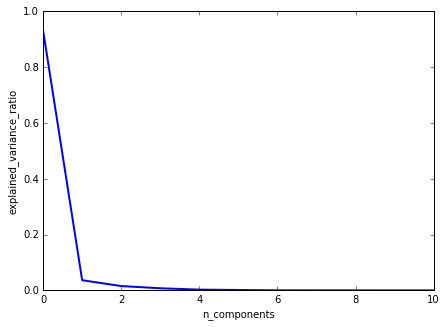

In [162]:
plt.figure(1, figsize=(7, 5))
#plt.clf()
plt.axis([0, 10, 0., 1])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')

In [27]:
#pca1 = PCA(n_components=2)
#X_pca = pca1.fit_transform(XX)

In [22]:
'''from sklearn.decomposition import KernelPCA
pca2=KernelPCA(n_components=2)
X_pca2=pca2.fit_transform(spectra)
print(X_pca.shape)'''

'from sklearn.decomposition import KernelPCA\npca2=KernelPCA(n_components=2)\nX_pca2=pca2.fit_transform(spectra)\nprint(X_pca.shape)'

In [326]:
import numpy as np
import pandas as pd

class FeatureExtractorClf(object):
    def __init__(self):

        pass

    def fit(self, X_df, y_df):
        
        pass
    
    #def transform(self, X_df):
        #XX = np.array([np.array(dd) for dd in X_df['spectra']])
        #return XX
#### Centrer et réduire les données    
    def transform(self, X_df):
        XX = np.array([np.array(dd) for dd in X_df['spectra']])
        return XX

### Classification: predicting the molecule type

The classifier follows a classical scikit-learn classifier template. It should be saved in the file <code>classifier.py</code>. In its simplest form it takes a scikit-learn pipeline and assignes it to <code>self.clf</code> in <code>__init__</code>.

** PREMIER TEST AVEC PCA WITH 10 COMPONENTS AND RANDOMFORESTCLASSIFIER **

In [331]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.decomposition import PCA,KernelPCA,NMF
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
#'clf', GradientBoostingClassifier(n_estimators=self.n_estimators, random_state=42)

class Classifier(BaseEstimator):
    def __init__(self):
        self.n_components = 11
        self.n_estimators = 300
        self.clf = Pipeline([
            ('Pca',PCA(n_components=self.n_components)), 
            ('clf', LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=200, 
                                       fit_intercept=True, intercept_scaling=1, class_weight=None, 
                                       random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
                                       verbose=0, warm_start=False, n_jobs=1))
        ])

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

In [ ]:
'''from sklearn.cluster import SpectralClustering
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D

i=0
n_neighbors_list=[10,20,30]
for k in n_neighbors_list:
    spectral = SpectralClustering(n_clusters=4
                              ,eigen_solver='arpack'
                              ,affinity="nearest_neighbors"
                              ,n_neighbors=k              
                             )
    spectral_clustering=spectral.fit_predict(spectra)
    plt.figure(figsize=(15.0, 4.0))
    plt.subplot(1, 3, 1)
    plt.title("Spectral prediction"+ " using knn graph k = "+str(k), fontsize=16)
    plt.scatter(x=X_pca[:,0],y=spectral_clustering,c=getColors(spectral_clustering))
    
    fig = pylab.figure()
    ax = Axes3D(fig)
    ax.scatter(X_pca[:,0],X_pca[:,1],spectral_clustering,c=getColors(spectral_clustering))
    pyplot.show()
    
    i=i+1
'''

In [308]:
'''from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.base import TransformerMixin

class EnsembleClassifier(BaseEstimator, ClassifierMixin, TransformerMixin):

    def __init__(self, clfs, voting='hard', weights=None):

        self.clfs = clfs
        self.named_clfs = {key:value for key,value in _name_estimators(clfs)}
        self.voting = voting
        self.weights = weights


    def fit(self, X, y):
        
        if isinstance(y, np.ndarray) and len(y.shape) > 1 and y.shape[1] > 1:
            raise NotImplementedError('Multilabel and multi-output'\
                                      ' classification is not supported.')

        if self.voting not in ('soft', 'hard'):
            raise ValueError("Voting must be 'soft' or 'hard'; got (voting=%r)"
                             % voting)

        if self.weights and len(self.weights) != len(self.clfs):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d clfs'
                             % (len(self.weights), len(self.clfs)))

        self.le_ = LabelEncoder()
        self.le_.fit(y)
        self.classes_ = self.le_.classes_
        self.clfs_ = []
        for clf in self.clfs:
            fitted_clf = clone(clf).fit(X, self.le_.transform(y))
            self.clfs_.append(fitted_clf)
        return self

    def predict(self, X):
       
        if self.voting == 'soft':

            maj = np.argmax(self.predict_proba(X), axis=1)

        else:  # 'hard' voting
            predictions = self._predict(X)

            maj = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)

        maj = self.le_.inverse_transform(maj)
        return maj

    def predict_proba(self, X):
       
        avg = np.average(self._predict_probas(X), axis=0, weights=self.weights)
        return avg

    def transform(self, X):
        
        if self.voting == 'soft':
            return self._predict_probas(X)
        else:
            return self._predict(X)

    def get_params(self, deep=True):
        """ Return estimator parameter names for GridSearch support"""
        if not deep:
            return super(EnsembleClassifier, self).get_params(deep=False)
        else:
            out = self.named_clfs.copy()
            for name, step in six.iteritems(self.named_clfs):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

    def _predict(self, X):
        """ Collect results from clf.predict calls. """
        return np.asarray([clf.predict(X) for clf in self.clfs_]).T

    def _predict_probas(self, X):
        """ Collect results from clf.predict calls. """
        return np.asarray([clf.predict_proba(X) for clf in self.clfs_])'''

In [310]:
'''from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


ada=AdaBoostClassifier(RandomForestClassifier( max_depth=5,class_weight="balanced",n_estimators=10),n_estimators=10)
gbc=GradientBoostingClassifier(max_depth=5,min_samples_split=4,learning_rate=0.3,max_features='log2',n_estimators=100,warm_start=True)
svc=SVC(kernel ="linear",class_weight='balanced',shrinking=True,probability=True)


class Classifier(BaseEstimator):
    def __init__(self):
        pipe1 = Pipeline([
            ('imputer', Imputer(strategy='most_frequent')),
            ('eclf', EnsembleClassifier(clfs=[gbc,svc,ada],voting='hard'))
            
        ])
        pipe2 = Pipeline([
            ('imputer', Imputer(strategy='most_frequent')),
            ('knn',KNeighborsClassifier(n_neighbors=5) )
            
        ])
        
        self.clf = EnsembleClassifier(clfs=[pipe1,pipe2],voting='soft',weights=[4,1])  
        
        
        
    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)
    '''


Let's put the feature extractor and classifier together and see what we get.  
**You will not have to submit the function <code>train_test_model_clf</code>.** A similar function is implemented on our servers. Your class and associated methods should be called the same way. 

In [332]:
from sklearn.model_selection import ShuffleSplit
#from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

labels = np.array(['A', 'B', 'Q', 'R'])

def train_test_model_clf(X_df, y_df, skf_is, FeatureExtractor, Classifier):
    train_is, test_is = skf_is
    X_train_df = X_df.iloc[train_is].copy()                                  
    y_train_df = y_df.iloc[train_is].copy()
    y_train_clf = y_train_df['molecule'].values
    X_test_df = X_df.iloc[test_is].copy()                                    
    y_test_df = y_df.iloc[test_is].copy() 
    y_test_clf = y_test_df['molecule'].values 
    # Feature extraction
    fe_clf = FeatureExtractor()
    fe_clf.fit(X_train_df, y_train_df)
    X_train_array_clf = fe_clf.transform(X_train_df)
    X_test_array_clf = fe_clf.transform(X_test_df)
    # Train
    clf = Classifier()
    clf.fit(X_train_array_clf, y_train_clf)
    # Test 
    y_proba_clf = clf.predict_proba(X_test_array_clf)                        
    y_pred_clf = labels[np.argmax(y_proba_clf, axis=1)]                      
    error = 1 - accuracy_score(y_test_clf, y_pred_clf)                       
    print('error = %s' % error)                                                                            
    print('classification report:\n %s' % classification_report(y_test_clf, y_pred_clf))
    print('confusion matrix:\n %s' % confusion_matrix(y_test_clf, y_pred_clf))


skf = ShuffleSplit(n_splits=2, test_size=0.2, random_state=57)  
skf_is = list(skf.split(X_df))[0]

train_test_model_clf(X_df, y_df, skf_is, FeatureExtractorClf, Classifier)

error = 0.03
classification report:
              precision    recall  f1-score   support

          A       0.97      0.97      0.97        63
          B       0.98      0.91      0.94        45
          Q       1.00      1.00      1.00        40
          R       0.95      1.00      0.97        52

avg / total       0.97      0.97      0.97       200

confusion matrix:
 [[61  1  0  1]
 [ 2 41  0  2]
 [ 0  0 40  0]
 [ 0  0  0 52]]


** DEUXIEME TEST AVEC PCA WITH 10 COMPONENTS AND LDA **

### Feature extractor for regression

Similarly to the feature extractor for classification, the feature extractor for regression should be implemented by a function <code>transform</code> and be part of the <code>FeatureExtractorReg</code> class, saved in the file <code>feature_extractor_reg.py</code>.  
<code>transform</code> receives the pandas dataframe <code>X_df</code> defined at the beginning of the notebook. The dataframe is augmented by four columns. At train time these columns contain the one-hot encoded molecule type; at test time, it receives the class posteriors. In this way you can use the classification information in the feature extractor of the regressor. The feature extractor should produce a numpy array representing the features extracted, which would be used for the regression.

In the example below, the features extracted are the molecule types and the standardized Raman spectra.

In [231]:
labels = np.array(['A', 'B', 'Q', 'R'])

class FeatureExtractorReg(object):
    def __init__(self):
        pass

    def fit(self, X_df, y):
        pass
    
    def transform(self, X_df):                                                   
        XX = np.array([np.array(dd) for dd in X_df['spectra']])                  
        XX -= np.median(XX, axis=1)[:, None]                                     
        XX /= np.sqrt(np.sum(XX ** 2, axis=1))[:, None]                          
        XX = np.concatenate([XX, X_df[labels].values], axis=1)                   
        return XX   

### Regression: predicting the concentration

The regressor follows a classical scikit-learn regressor template. It should be saved in the file <code>regressor.py</code>. In its simplest form it takes a scikit-learn pipeline and assignes it to <code>self.reg</code> in <code>__init__</code>.  

In the example below, one model is created for each type of molecule

As mentionned above, the error metric is the mean absolute relative error (mare): $$\frac{1}{n_{samples}}\sum_{k=1}^{n_{samples}}\left|\frac{y-\hat{y}}{y}\right|$$ with $y$ and $\hat{y}$ being the true and predicted concentration.

In [292]:
from sklearn.ensemble import GradientBoostingRegressor                           
from sklearn.decomposition import PCA ,KernelPCA                                           
from sklearn.pipeline import Pipeline                                            
from sklearn.base import BaseEstimator                                           
import numpy as np     
from sklearn.linear_model import LogisticRegression
                                                                                 
                                                                                 
class Regressor(BaseEstimator):                                                  
    def __init__(self):                                                          
        self.n_components = 10                                                  
        self.n_estimators = 500                                                   
        self.learning_rate = 0.20                                                 
        self.list_molecule = ['A', 'B', 'Q', 'R']                                
        self.dict_reg = {}                                                       
        for mol in self.list_molecule:                                           
            self.dict_reg[mol] = Pipeline([                                      
                ('pca', PCA(n_components=self.n_components)),                    
                ('reg', GradientBoostingRegressor(                               
                    n_estimators=self.n_estimators,                              
                    learning_rate=self.learning_rate,                            
                    random_state=42))                                            
            ])                                                                   
                                                                                 
    def fit(self, X, y):                                                         
        for i, mol in enumerate(self.list_molecule):                             
            ind_mol = np.where(np.argmax(X[:, -4:], axis=1) == i)[0]             
            XX_mol = X[ind_mol]                                                  
            y_mol = y[ind_mol].astype(float)                                     
            self.dict_reg[mol].fit(XX_mol, np.log(y_mol))                        
                                                                                 
    def predict(self, X):                                                        
        y_pred = np.zeros(X.shape[0])                                            
        for i, mol in enumerate(self.list_molecule):                             
            ind_mol = np.where(np.argmax(X[:, -4:], axis=1) == i)[0]             
            XX_mol = X[ind_mol].astype(float)                                    
            y_pred[ind_mol] = np.exp(self.dict_reg[mol].predict(XX_mol))         
        return y_pred                                                                            

Let's put the feature extraction, classification, and regression together, and see what we get!  

As mentionned above, **you will not have to submit the function <code>train_test_model</code>**. A similar function is implemented on our servers. Your class and associated methods should be called the same way. 

In [293]:
def mare_score(y_true, y_pred):                                                  
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

def train_test_model(X_df, y_df, skf_is, FeatureExtractorClf, Classifier, FeatureExtractorReg, Regressor):
    train_is, test_is = skf_is
    X_train_df = X_df.iloc[train_is].copy()                                  
    y_train_df = y_df.iloc[train_is].copy()                                  
    X_test_df = X_df.iloc[test_is].copy()                                    
    y_test_df = y_df.iloc[test_is].copy()                                    
    y_train_clf = y_train_df['molecule'].values                              
    y_train_reg = y_train_df['concentration'].values                         
    y_test_clf = y_test_df['molecule'].values                                
    y_test_reg = y_test_df['concentration'].values                           

    # Classification
    fe_clf = FeatureExtractorClf()                     
    fe_clf.fit(X_train_df, y_train_df)                                       
    X_train_array_clf = fe_clf.transform(X_train_df)                         
    X_test_array_clf = fe_clf.transform(X_test_df)                           
                                                                                 
    clf = Classifier()                                            
    clf.fit(X_train_array_clf, y_train_clf)                                  
    y_proba_clf = clf.predict_proba(X_test_array_clf)                        
    y_pred_clf = labels[np.argmax(y_proba_clf, axis=1)]                      
    error = 1 - accuracy_score(y_test_clf, y_pred_clf)                       
    print('error = ', error)
    
    # Regression
    fe_reg = FeatureExtractorReg()                     
    for i, label in enumerate(labels):
        # For training, we use 
        X_train_df.loc[:, label] = (y_train_df['molecule'] == label)         
        X_test_df.loc[:, label] = y_proba_clf[:, i]                          
    fe_reg.fit(X_train_df, y_train_reg)                                      
    X_train_array_reg = fe_reg.transform(X_train_df)                         
    X_test_array_reg = fe_reg.transform(X_test_df)                           
                                                                                 
    reg = Regressor()                                              
    reg.fit(X_train_array_reg, y_train_reg)                               
    y_pred_reg = reg.predict(X_test_array_reg)
    mare = mare_score(y_test_reg, y_pred_reg)
    print('mare = ', mare)                
    print('combined error = ', 2. / 3 * error + 1. / 3 * mare)


skf = ShuffleSplit(n_splits=2, test_size=0.2, random_state=57) 
skf_is = list(skf.split(X_df))[0]

train_test_model(X_df, y_df, skf_is, FeatureExtractorClf, Classifier, FeatureExtractorReg, Regressor)

error =  0.025
mare =  0.155318640586
combined error =  0.0684395468618


## Unit testing

You should use this notebook for preliminary analysis and visualization. Before submitting, you should make sure the code has no errors. First, copy-paste your four workflow elements into <code>feature_extractor_clf.py</code>, <code>feature_extractor_reg.py</code>, <code>classifier.py</code>, and <code>regressor.py</code>. Then execute the user_test_submission code, either in a separate terminal or below. You can also look at user_test_submission.py to see how we cross-validate and score your submissions. But don't modify it: its goal is to mimic what we do at our backend.

**If it runs and prints**   
<code>
Reading file ...
Training file ...
<verb>--------------------------</verb>
error =  [some_number_between_0_and_1]
mare =  [some_number_between_0_and_1]
combined error =  [some_number_between_0_and_1]
<verb>--------------------------</verb>
error =  [some_number_between_0_and_1]
mare =  [some_number_between_0_and_1]
combined error =  [some_number_between_0_and_1]
</code>
**you can submit the code.**

To run user_test_submission.py and test your code from the notebook you can do:

In [6]:
!python user_test_submission.py

Reading file ...
Training file ...
--------------------------
error = 0.02
mare =  0.0341904761905
combined error =  0.0247301587302
--------------------------
error = 0.04
mare =  0.0489781746032
combined error =  0.0429927248677
--------------------------
error = 0.03
mare =  0.0429642857143
combined error =  0.0343214285714
--------------------------
error = 0.025
mare =  0.0570238095238
combined error =  0.0356746031746
